# Programa básico para leitura de dados da pasta "14nov22"

In [ ]:
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

#id é o código que aparece depois de /d/ no link da sua planilha
#exemplo: https://docs.google.com/spreadsheets/d/****id****/resto_do_link
id = '1dG7aw5H5i79on4v9gqcva-llq4UpeEuVVjcd4vR4Ydg'

nome = '14nov22' #como está no sheets
caminho = f'https://docs.google.com/spreadsheets/d/{id}/gviz/tq?tqx=out:csv&sheet={nome}'

COLUNAS_UTEIS = [0,2,4,6,8,10,12,14] # porque as outras colunas não tem dados
#transforma sua planilha em uma tabela
TABELA = read_csv(caminho, decimal=',', header=0, usecols=COLUNAS_UTEIS)
print(TABELA,'\n')


       o 12    o 6  o 13    o 9   o 14   o 15   o 16    o 5
0     413.0  433.0   392  430.0  388.0  403.0  407.0  438.0
1     417.0  433.0   396  429.0  388.0  412.0  407.0  439.0
2     414.0  433.0   390  430.0  390.0  404.0  406.0  444.0
3     414.0  434.0   397  430.0  390.0  410.0  408.0  436.0
4     415.0  433.0   392  428.0  388.0  401.0  409.0  444.0
...     ...    ...   ...    ...    ...    ...    ...    ...
7402    NaN    NaN   380    NaN    NaN    NaN    NaN    NaN
7403    NaN    NaN   392    NaN    NaN    NaN    NaN    NaN
7404    NaN    NaN   381    NaN    NaN    NaN    NaN    NaN
7405    NaN    NaN   391    NaN    NaN    NaN    NaN    NaN
7406    NaN    NaN   384    NaN    NaN    NaN    NaN    NaN

[7407 rows x 8 columns] 



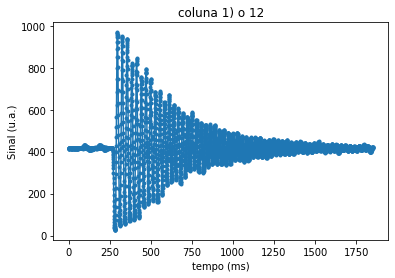

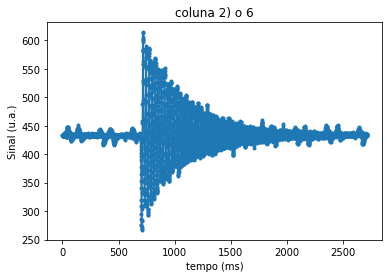

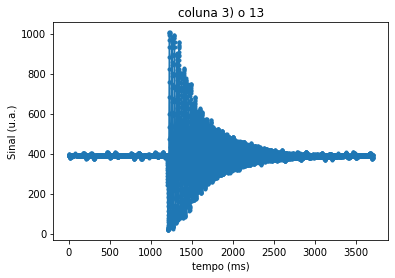

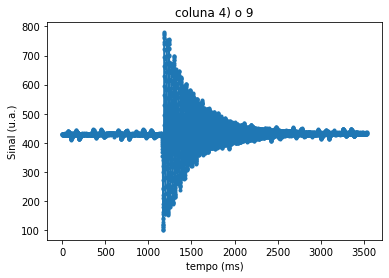

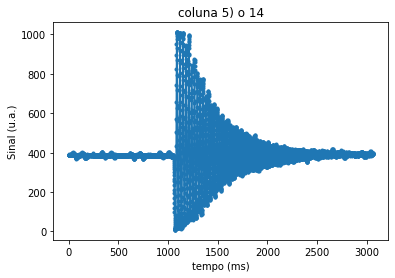

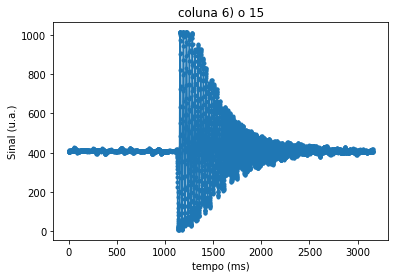

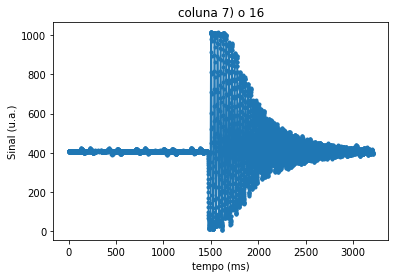

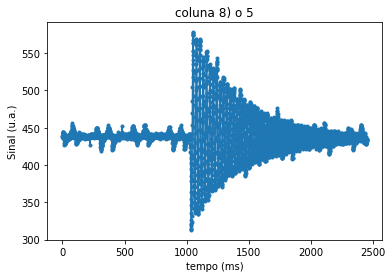

In [ ]:
# para extrair os dados da tabela criada
def extraiDados( SERIE, TAB=TABELA):
  yALL = TAB[SERIE].to_numpy()#coluna
  y = yALL[np.isfinite(yALL)]#TIrar os nulls
  nDados = len(y)
  Dt = 0.5#intervalo de tempo entre cada medida
  t = Dt*np.arange( 0., nDados )
  return t, y

for i, SERIE in enumerate(TABELA.keys()):
  t, y = extraiDados( SERIE )
  plt.figure()
  plt.plot( t, y, '.-')
  plt.xlabel( 'tempo (ms)' )
  plt.ylabel( 'Sinal (u.a.)')
  plt.title( f'coluna {i+1}) {SERIE}')
  plt.show()

#o9

Text(0.5, 1.0, 'Tempo de oscilação em função do tempo off')

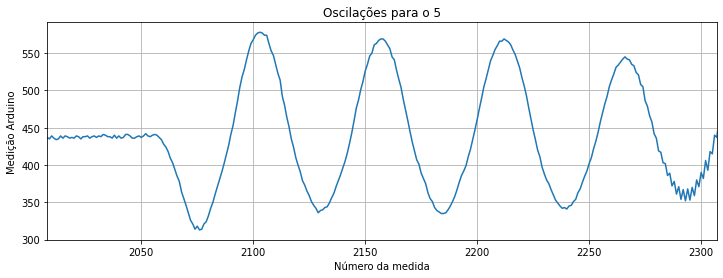

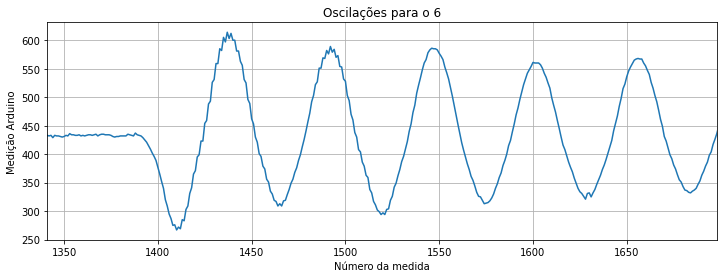

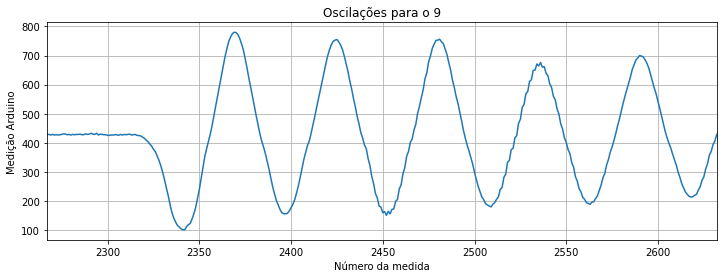

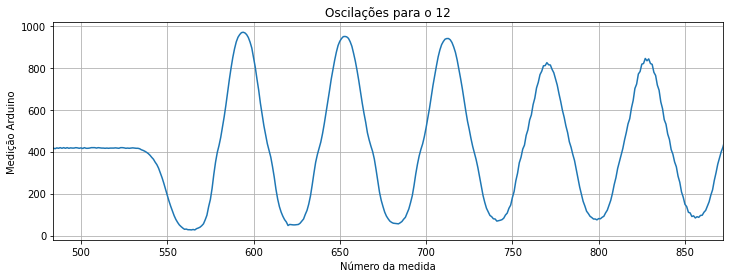

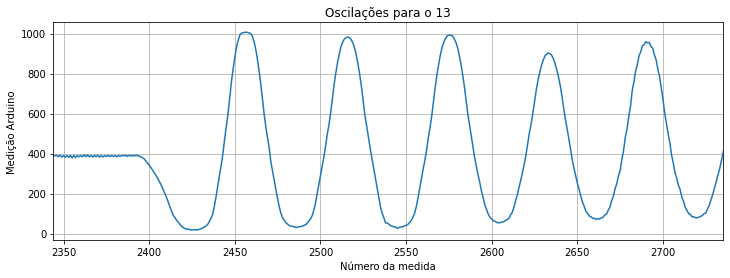

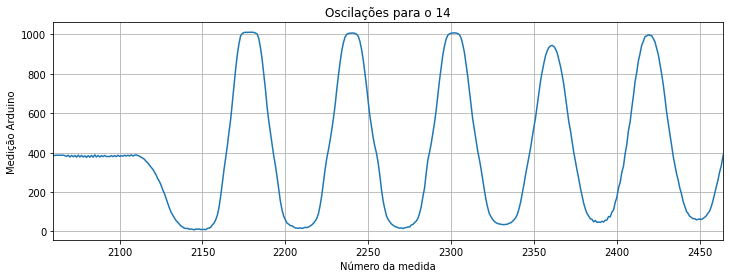

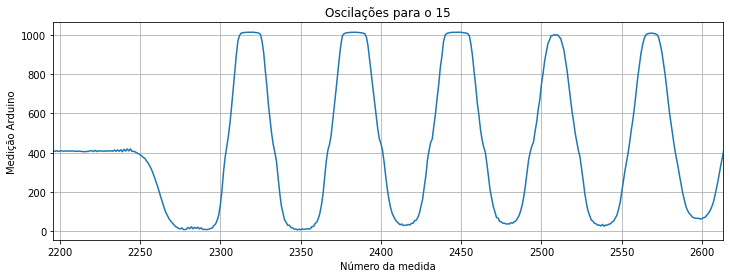

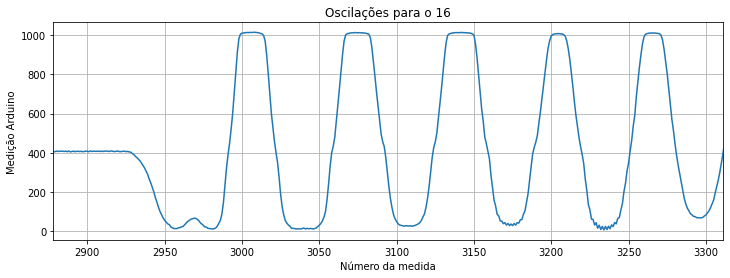

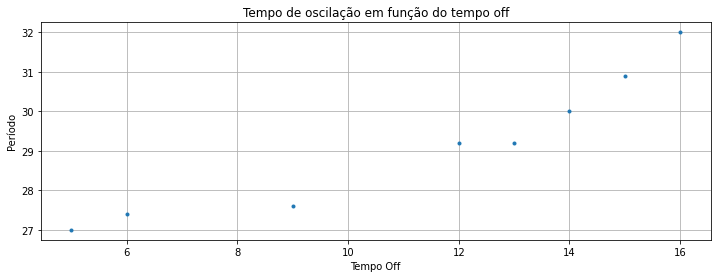

In [ ]:
t_step=0.5
n_ciclos=5

def calcula_periodo(info,ncrit,n_ciclos,make_graph=None,write=None):

  t,y=extraiDados(info)

  valor_medio=np.mean(y[0:ncrit])#achar o ponto 0.


  nS=[]#todos os tempos que ele registro
  for n in np.arange(ncrit,len(t)-1):#pegar os pontos aparti do ncritico ate o fim da oscilação
    if (y[n]<valor_medio and y[n+1]>valor_medio):#pegar os me
      if(abs(y[n]-valor_medio)>abs(y[n+1]-valor_medio)):#sempre da o appende no maior
        nS.append(n+1)
      else:
        nS.append(n)

  deltaN=[]
  for j in range(n_ciclos):
    if (nS[j+1]-nS[j])>30: #Essa é uma condição de segurança, pra não ter problemas com dados que são tomados "errados", assim só realmente as coisas que queremos são coletadas
      deltaN.append(nS[j+1]-nS[j])#delta n = periodo

  if make_graph:
    plt.figure(figsize=[12,4])
    plt.grid()
    plt.plot(np.arange(len(t)),y)
    plt.xlim(ncrit-50,nS[n_ciclos])#de onde vem esse -50??
    plt.ylabel("Medição Arduino")
    plt.xlabel("Número da medida")
    plt.title(f"Oscilações para {info}")

  if write:
    print(f"dtoff:{info}")
    print(f"Valor médio da medição no Arduino antes da oscilação = {valor_medio}")
    print(f"Período médio={np.mean(deltaN)*t_step} ms ou {np.mean(deltaN)} ciclos")
    print()

  return np.mean(deltaN)*t_step #periodo medio de todos os deltas n , periodo medio de oscilações


dados=[{"nome":"o 5", "ncrit":2058},{"nome": "o 6", "ncrit":1391},
       {"nome":"o 9", "ncrit":2317},{"nome":"o 12", "ncrit":534},
       {"nome":"o 13", "ncrit":2394},{"nome":"o 14", "ncrit":2110},
       {"nome":"o 15", "ncrit":2246},{"nome":"o 16", "ncrit":2928}
       ]

tempos=[5,6,9,12,13,14,15,16]

periodos=[]#periodo medio
for k in range(len(tempos)):
  T=calcula_periodo(dados[k]["nome"],dados[k]["ncrit"],n_ciclos,make_graph=True,write=False)
  periodos.append(T)

plt.figure(figsize=[12,4])
plt.grid()
plt.plot(tempos,periodos,".")
plt.ylabel("Período")
plt.xlabel("Tempo Off")
plt.title("Tempo de oscilação em função do tempo off")